In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
#Una semilla para generar los mismos
np.random.seed(42)

# 1. Generación de los Datos Sinteticos

In [2]:
def genera_datos(n,w,ds):
  x=np.linspace(0,10,n)
  y=w*x+np.random.normal(0,ds,n)
  return x,y

In [11]:
n_puntos=500000
pendiente=2.8   #omega
ds=10
x,y=genera_datos(n_puntos,pendiente,ds)

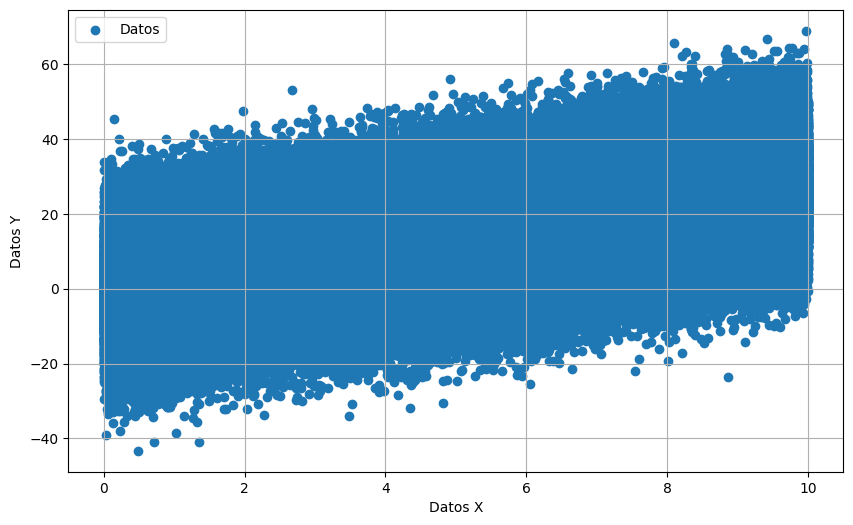

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(x,y, label="Datos")
plt.xlabel("Datos X")
plt.ylabel("Datos Y")
plt.legend()
plt.grid(True)
plt.show()

# 2. Busqueda de la mejor recta por tanteo:

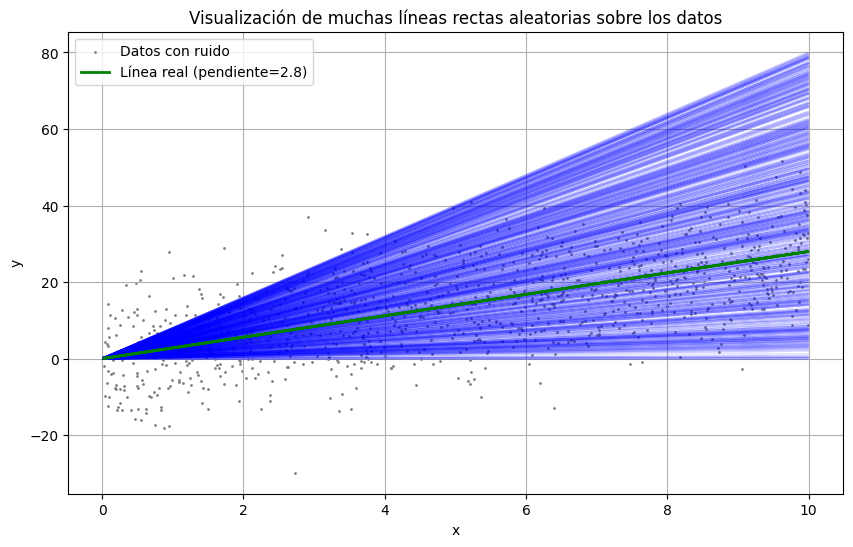

In [13]:
# Tomar una muestra pequeña para graficar (por el tamaño tan grande del set)
idx = np.random.choice(np.arange(n_puntos), size=1000, replace=False)
x_sample = x[idx]
y_sample = y[idx]

# Graficar los datos de ejemplo
plt.figure(figsize=(10, 6))
plt.scatter(x_sample, y_sample, s=1, color='gray', label='Datos con ruido')

# Dibujar muchas líneas con pendientes aleatorias
for _ in range(500):  # número de líneas
    w_rand = np.random.uniform(0, 8)  # pendiente aleatoria entre 0 y 5
    y_rand = w_rand * x_sample
    plt.plot(x_sample, y_rand, alpha=0.1, color='blue')

# Línea verdadera (opcional)
plt.plot(x_sample, pendiente * x_sample, color='green', linewidth=2, label='Línea real (pendiente=2.8)')

# Estética
plt.xlabel("x")
plt.ylabel("y")
plt.title("Visualización de muchas líneas rectas aleatorias sobre los datos")
plt.legend()
plt.grid(True)
plt.show()

# 3. Curva de Aprendizaje

In [15]:
def funcion_costo(x, y):
    omega1 = np.linspace(0, 8, 500)
    J = []  # Lista para almacenar el valor de costo para cada omega1

    for w in omega1:
        h = w * x
        error = np.mean((h - y)**2)
        J.append(error)

    return omega1, np.array(J)

In [16]:
omega1_vals, J_vals = funcion_costo(x, y)

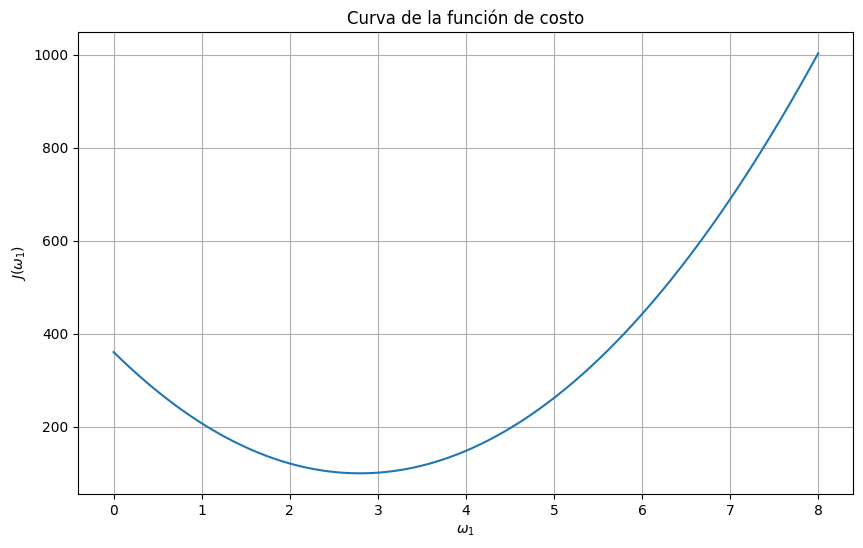

In [17]:
# Graficar la función de costo
plt.figure(figsize=(10, 6))
plt.plot(omega1_vals, J_vals)
plt.xlabel(r'$\omega_1$')
plt.ylabel(r'$J(\omega_1)$')
plt.title('Curva de la función de costo')
plt.grid(True)
plt.show()


# 4. Ecuaciones Normales

In [14]:
inicio = time.time()
#---------------------
#Cálculo del perso omega
omega=(sum(x*y)/sum(x*x))
print(omega)
#---------------------
fin = time.time()
print(f'Tiempo de calculo en {fin-inicio} segundo')

2.796221574341039
Tiempo de calculo en 0.06292366981506348 segundo


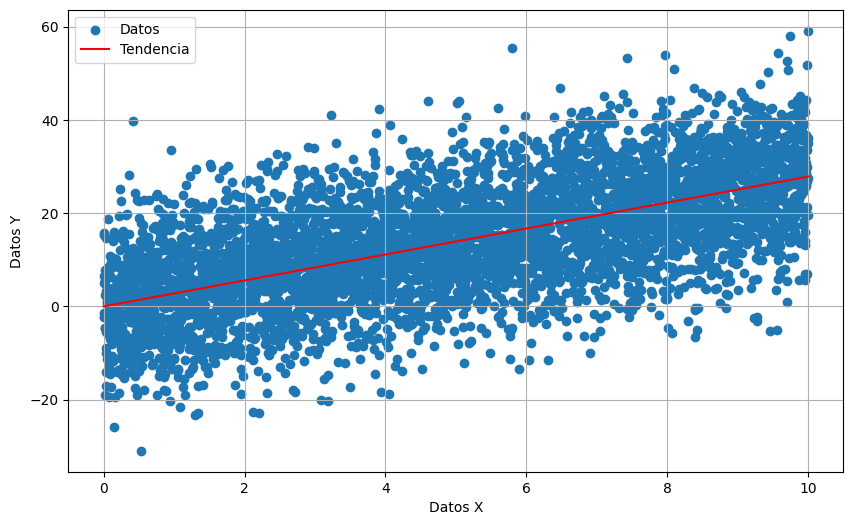

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(x,y, label="Datos")
plt.plot(x, omega*x, color="red", label="Tendencia")
plt.xlabel("Datos X")
plt.ylabel("Datos Y")
plt.legend()
plt.grid()
plt.show()